In [16]:
from jupyterthemes import jtplot
jtplot.style(figsize = (15, 10), grid = False, ticks = True)

In [17]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

In [3]:
cmap_name = 'seismic'
my_cmap = cm.get_cmap(cmap_name, 512)
my_cmap = ListedColormap(my_cmap(np.linspace(0.45, 0.55, 2)))

# Theory

**Assumptions**
- Binary classification  $\to y_i \in \{−1,+1\}$
- Data is linearly separable

**Classifier**
$$h(x_i) = \begin{cases}
1 \iff w^Tx + b \geq 0 
\\ -1 \text{ otherwise}
\end{cases}$$

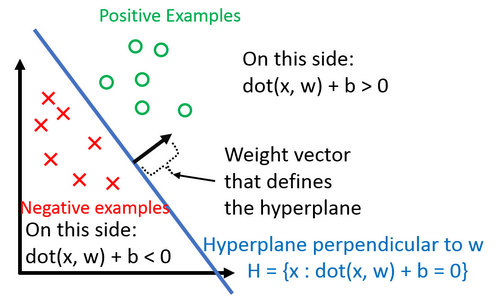



**Note**
- $ y_i(w^Tx_i + b) > 0 \iff x_i $ is classified correctly
- $y_i \in \{−1,+1\}$ for this condition to work

**Why the bias?**
- If we didn't have the bias our decision boundary would've always passed through the origin
- Therefore a dataset such as the one in the image above would be unclassifiable

*Intuition*
1. Using a bias we can move away from the origin

2. Geometric interpretation $\to$ Extend one dimension and make the equation go through the origin
$$ \begin{bmatrix}x_i \\ 1 \end{bmatrix}^T \begin{bmatrix} w \\ b \end{bmatrix} = w^Tx_i + b$$
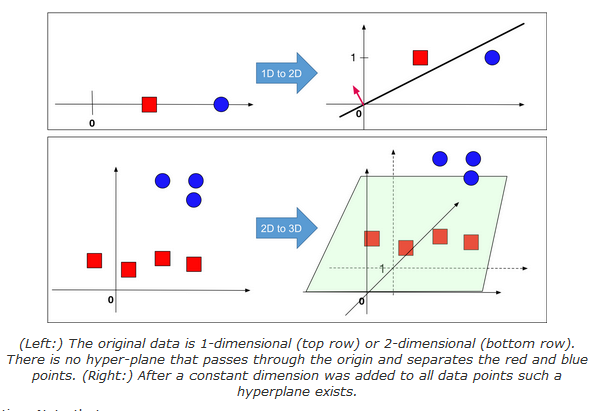

**Perceptron step**

If we missclassify a sample $i$ we must correct
- $w = w + \alpha \cdot y_i \cdot x_i$
- $b = b + \alpha \cdot y_i$
- where $\alpha$ is the learning rate
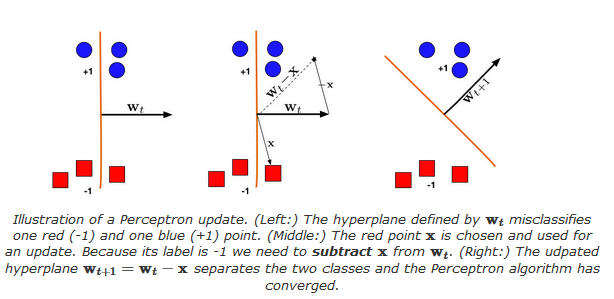

- https://youtu.be/wl7gVvI-HuY?list=PLl8OlHZGYOQ7bkVbuRthEsaLr7bONzbXS&t=1567 - This example for intuition

**Proof of convergence**
- http://www.cs.columbia.edu/~mcollins/courses/6998-2012/notes/perc.converge.pdf
- http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote03.html
- https://www.cse.iitb.ac.in/~shivaram/teaching/old/cs344+386-s2017/resources/classnote-1.pdf -page 4

# Code

## Perceptron class

In [4]:
class Perceptron:
    def __init__(self, dim=2, lr = 1, max_epochs = 1000 ):
        self.w = np.zeros(dim)  # np.random.randn(dim)
        self.b = np.ones(1)  # bias
        self.max_epochs = max_epochs
        self.lr = lr  # learning rate
        self.dim = dim
        
    def fit(self, X, y):
        '''
        Fits the model to the data
        Arguments
            X: ndarray -- data of shape (n_samples, n_features)
            y: ndarray -- labels of shape (n_samples, )
        return:
            self: Perceptron -- return the fitted model
        '''
        assert X.shape[1] == self.dim, f"a sample in X must have the number of {self.dim} dimensions"
        assert X.shape[0] == y.shape[0], f"different number of samples in the dataset and labels"
        
        ## Code below
        ### Things to take into account: 1. When do we stop? 2. When do we update?
                
        return self
    
    def predict(self, X):
        '''
        Arguments
            X: ndarray -- data of shape (n_samples, n_features)
        Returns:
            y_pred: ndarray -- predicted values of shape (n_samples, )
        '''
        ## Code below
        
        return y_pred

## Compare

In [4]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=170) #random state 0 or 5 for mixed, 1, 2, 170 for cool
y = np.array([1 if yi == 1 else -1 for yi in y])

# Code: Scatter plot to look at data


In [2]:
# Fit predict


In [1]:
# Scatter plot the results


## Plot decision boundary

Text(0.5, 1.0, 'Perceptron')

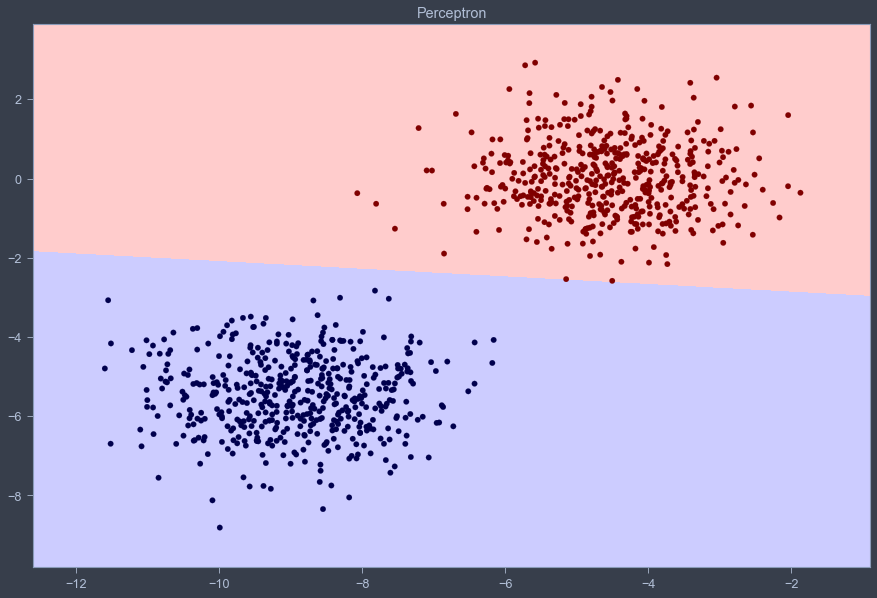

In [10]:
h = 0.025
#https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots( figsize = (15, 10))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=my_cmap)
#ax.contourf(xx, yy, Z, colors = ['blue, red'])
#ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap = cmap_name)
ax.set_title('Perceptron')

# Digits

In [18]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [19]:
data = load_digits()

In [20]:
X_, y_ = data['data'], data['target']

Label: 0


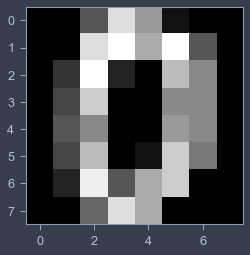

In [21]:
idx = 0
print(f"Label: {y_[idx]}")
plt.imshow(X_[idx].reshape(8, 8), cmap = 'gray')

In [23]:
np.max(X_)

16.0

In [ ]:
# Task: Pick 2 classes and apply perceptron to them
# Step 1. Pick the classes and prepare the data for the perceptron algorithm
# Step 2. Split the data into training and test data
# Step 3. Train the modelz
# Step 4. Analyze the results